In [1]:
import xarray as xr
import rioxarray as rio
import glob
import os
import geopandas as gpd
import hvplot.xarray
import holoviews as hv
hv.extension("bokeh")
import numpy as np

In [5]:
# Ouverture des données soit depuis plusieurs fichiers soit depuis un seul déjà clip
extent = xr.open_dataarray("/home/onyxia/work/data/masque_etangs.tif").squeeze("band",drop=True)
time_serie = xr.open_dataset("/home/onyxia/work/L3/out_dir/S2_L3_2020.nc")
# time_serie_cliped = rio.open_rasterio(r"E:\Stage_PNRBrenne\Data\Data_Sentinel\L3\S2_concat\S2_L3A_2020.nc")
time_serie

<xarray.Dataset> Size: 18GB
Dimensions:      (y: 6250, x: 5667, time: 13)
Coordinates:
  * y            (y) float64 50kB 6.651e+06 6.651e+06 ... 6.589e+06 6.589e+06
  * x            (x) float64 45kB 5.376e+05 5.376e+05 ... 5.942e+05 5.942e+05
  * time         (time) datetime64[ns] 104B 2020-01-15 2020-02-15 ... 2020-12-15
Data variables:
    B11          (time, y, x) float32 2GB ...
    B12          (time, y, x) float32 2GB ...
    B2           (time, y, x) float32 2GB ...
    B3           (time, y, x) float32 2GB ...
    B4           (time, y, x) float32 2GB ...
    B5           (time, y, x) float32 2GB ...
    B6           (time, y, x) float32 2GB ...
    B7           (time, y, x) float32 2GB ...
    B8           (time, y, x) float32 2GB ...
    B8A          (time, y, x) float32 2GB ...
    spatial_ref  int32 4B ...

In [4]:
# Application du masque étangs
ts_c_masked = xr.where(extent == 1, time_serie, np.nan)
ts_c_masked

<xarray.Dataset> Size: 18GB
Dimensions:      (y: 6250, x: 5667, time: 13)
Coordinates:
    spatial_ref  int64 8B ...
  * x            (x) float64 45kB 5.376e+05 5.376e+05 ... 5.942e+05 5.942e+05
  * y            (y) float64 50kB 6.651e+06 6.651e+06 ... 6.589e+06 6.589e+06
  * time         (time) datetime64[ns] 104B 2020-01-15 2020-02-15 ... 2020-12-15
Data variables:
    B11          (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan
    B12          (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan
    B2           (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan
    B3           (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan
    B4           (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan
    B5           (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan
    B6           (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan
    B7           (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan
    B8           (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan
    B8A          (y, x, time) float32 2GB nan nan nan nan ... nan nan nan nan

In [7]:
# Calcul MNDWI
B3 = time_serie["B3"]
B12 = time_serie["B12"]
mndwi = (B3-B12)/(B3+B12)
mndwi.name = "mndwi_2020"
# path_save = os.path.join("/home/onyxia/work/prod",mndwi.name+".nc")
# mndwi.to_netcdf(path_save)
mndwi

<xarray.DataArray 'mndwi_2020' (time: 13, y: 6250, x: 5667)> Size: 2GB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(13, 6250, 5667), dtype=float32)
Coordinates:
  * y        (y) float64 50kB 6.651e+06 6.651e+06 ... 6.589e+06 6.589e+06
  * x        (x) float64 45kB 5.376e+05 5.376e+05 ... 5.942e+05 5.942e+05
  * time     (time) datetime64[ns] 104B 2020-01-15 2020-02-15 ... 2020-12-15

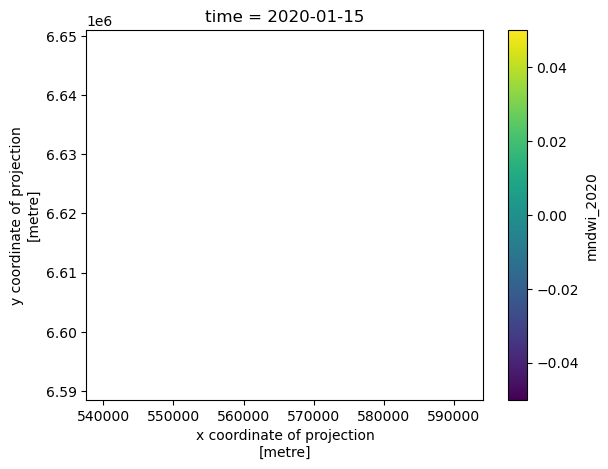

In [8]:
mndwi.isel(time=0).plot()

In [7]:
# Calcul NDVI
B4 = ts_c_masked["B4"]
B8 = ts_c_masked["B8"]
ndvi = (B8-B4)/(B8+B4)
ndvi.name = "ndvi_2020"
path_save = os.path.join("/home/onyxia/work/prod",ndvi.name+".nc")
# ndvi.transpose(np.str_('time'), 'y', 'x').rio.to_raster(path_save)
ndvi.to_netcdf(path_save)
ndvi

<xarray.DataArray 'ndvi_2020' (y: 6250, x: 5667, time: 13)> Size: 2GB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(6250, 5667, 13), dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0
  * x            (x) float64 45kB 5.376e+05 5.376e+05 ... 5.942e+05 5.942e+05
  * y            (y) float64 50kB 6.651e+06 6.651e+06 ... 6.589e+06 6.589e+06
  * time         (time) datetime64[ns] 104B 2020-01-15 2020-02-15 ... 2020-12-15